In [2]:
from ecell4 import *
%matplotlib inline
import numpy as np
import math
import sys
from math import sqrt
import matplotlib.pyplot as plt
from ecell4.extra import ensemble
import numpy as np
from math import pi

def wrap(job,job_id,task_id):
    def singlerun(kf,phit,phi,L,run,duration):
        import numpy as np
        rm=0.005
        D=1.
        R=2*rm
        rng = GSLRandomNumberGenerator()
        rng.seed(run)   
        f=1.0208582         
        rv=rm*f
        td =(2*rv)**2/(6*D)   
        kd = 4*math.pi*R*D*2
        kb=kf*kd
        with species_attributes():
            C | {'D':str(0.0),'radius':str(rv)}
            E | {'D':str(D),'radius':str(rv)}
            S | {'D':str(D),'radius':str(rv)}
            ES | {'D':str(0.0),'radius':str(rv)}
        with reaction_rules():
            #E+S >ES | kb
            E+S>~E+~S|kb


        m=get_model()
        w = spatiocyte.SpatiocyteWorld(Real3(L,L,L),rv,rng)
        w.bind_to(m)
        size=tuple(w.calculate_shape(Real3(L,L,L),rv))    
        Nev = size[0]*size[1]*size[2]
        NS=int(Nev*phit)
        NE=int(NS/5)
        Nc=int(Nev*phi)            
        w.add_molecules(Species('C'), Nc)
        w.add_molecules(Species('S'), NS)
        w.add_molecules(Species('E'), NE)
        sim = spatiocyte.SpatiocyteSimulator(w)
        sim.initialize()
        #duration = duration*td
        obs=FixedIntervalNumberObserver(td,['E','S'])
        sim.run(duration,obs)        
        #tlogs,nalog=np.array(obs.data()).T
        if run==1:
            print('kf={},phit={},phi={},L={}'.format(kf,phit,phi,L))
            #print('td={:.4e},kb={:.4e},kr={:.4e},kub={:.4e},kon={:.4e},Nc={},NE={},NS={},duration={:.4e}'.format(td,kb,kr,kub,kon,Nc,NE,NS,duration))
        return obs.data()#tlogs,nalog
    job.update({'run':task_id})
    out=singlerun(**job)
    return out

def exe(jobs,simrun):    
    #res=ensemble.run_multiprocessing(wrap,jobs,n=simrun,nproc=60,modules=('numpy','ecell4','math'))[0]
    res=ensemble.run_slurm(wrap,jobs,n=simrun,nproc=60,path='tmp',modules=('numpy','ecell4','math'),extra_args=['--exclude=ibc[02,12,27]'])[0]
    res = np.array(res)
    meanres = np.mean(res,axis=0)   
    tt=meanres.T[0]
    Ne=meanres.T[1]
    Ns=meanres.T[2]
    #Nes=meanres.T[3]
    name='/home/chew/outputdata/3Dirxncrowding_kf{:.1f}_phi{:.1f}phit{:.3f}L{}_Nratio5'.format(jobs[0]["kf"],jobs[0]["phi"],jobs[0]["phit"],jobs[0]["L"])
    f=open(name,'w')
    np.savetxt(name,np.column_stack([tt,Ns,Ne]),delimiter=',')
    f.close()    
    print(name,len(tt))
    plt.plot(tt,Ne,label='E')
    plt.semilogx(tt,Ns,label='S')
    #plt.plot(tt,Nes,label='ES')
    print('first',Ns[0],'last',Ns[-1])
    print('first',Ne[0],'last',Ne[-1])
    plt.legend()

DEBUG:sge:Submitted batch job 3016756
DEBUG:sge:             JOBID PARTITION     NAME     USER ST       TIME  NODES NODELIST(REASON)
DEBUG:sge:3016756_[1-1000%60     debug sge-seob     chew PD       0:00      1 (None)
DEBUG:sge:           2754894     debug job_08.s    niina  R 22-23:43:41      1 ibc01
DEBUG:sge:           2754895     debug job_09.s    niina  R 22-23:43:41      1 ibc01
DEBUG:sge:           2754897     debug job_16.s    niina  R 22-23:43:41      1 ibc01
DEBUG:sge:           2762398     debug plane_01    niina  R 22-21:44:14      1 ibc04
DEBUG:sge:           2762399     debug plane_02    niina  R 22-21:44:14      1 ibc04
DEBUG:sge:           2762400     debug plane_03    niina  R 22-21:44:14      1 ibc06
DEBUG:sge:           2762401     debug plane_04    niina  R 22-21:44:14      1 ibc06
DEBUG:sge:           2762402     debug plane_05    niina  R 22-21:44:14      1 ibc06
DEBUG:sge:           2762403     debug plane_06    niina  R 22-21:44:14      1 ibc19
DEBUG:sge:       

DEBUG:sge:           2762401     debug plane_04    niina  R 22-21:44:24      1 ibc06
DEBUG:sge:           2762402     debug plane_05    niina  R 22-21:44:24      1 ibc06
DEBUG:sge:           2762403     debug plane_06    niina  R 22-21:44:24      1 ibc19
DEBUG:sge:           2762404     debug plane_07    niina  R 22-21:44:24      1 ibc19
DEBUG:sge:           2762405     debug plane_08    niina  R 22-21:44:24      1 ibc19
DEBUG:sge:           2762406     debug plane_09    niina  R 22-21:44:24      1 ibc18
DEBUG:sge:           2762407     debug plane_10    niina  R 22-21:44:24      1 ibc18
DEBUG:sge:           2762408     debug plane_11    niina  R 22-21:44:24      1 ibc18
DEBUG:sge:           2762409     debug plane_12    niina  R 22-21:44:24      1 ibc18
DEBUG:sge:           2762411     debug plane_14    niina  R 22-21:44:24      1 ibc18
DEBUG:sge:           2762412     debug plane_15    niina  R 22-21:44:24      1 ibc18
DEBUG:sge:           2762413     debug plane_16    niina  R 22-21

DEBUG:sge:        3016756_19     debug sge-seob     chew  R       0:09      1 ibc04
DEBUG:sge:        3016756_20     debug sge-seob     chew  R       0:09      1 ibc04
DEBUG:sge:        3016756_21     debug sge-seob     chew  R       0:09      1 ibc04
DEBUG:sge:        3016756_22     debug sge-seob     chew  R       0:09      1 ibc04
DEBUG:sge:        3016756_23     debug sge-seob     chew  R       0:09      1 ibc04
DEBUG:sge:        3016756_24     debug sge-seob     chew  R       0:09      1 ibc04
DEBUG:sge:        3016756_25     debug sge-seob     chew  R       0:09      1 ibc04
DEBUG:sge:        3016756_26     debug sge-seob     chew  R       0:09      1 ibc04
DEBUG:sge:        3016756_27     debug sge-seob     chew  R       0:09      1 ibc05
DEBUG:sge:        3016756_28     debug sge-seob     chew  R       0:09      1 ibc05
DEBUG:sge:        3016756_29     debug sge-seob     chew  R       0:09      1 ibc05
DEBUG:sge:        3016756_30     debug sge-seob     chew  R       0:09      

DEBUG:sge:         3015817_1     debug sge-yclj     chew  R   15:35:11      1 ibc28
DEBUG:sge:         3015817_2     debug sge-yclj     chew  R   15:35:11      1 ibc28
DEBUG:sge:         3015817_3     debug sge-yclj     chew  R   15:35:11      1 ibc28
DEBUG:sge:         3015817_4     debug sge-yclj     chew  R   15:35:11      1 ibc28
DEBUG:sge:         3015817_5     debug sge-yclj     chew  R   15:35:11      1 ibc28
DEBUG:sge:         3016196_1     debug sge-qjvp     chew  R       6:43      1 ibc01
DEBUG:sge:         3016196_2     debug sge-qjvp     chew  R       6:43      1 ibc28
DEBUG:sge:         3016196_3     debug sge-qjvp     chew  R       6:43      1 ibc28
DEBUG:sge:         3016196_4     debug sge-qjvp     chew  R       6:43      1 ibc28
DEBUG:sge:         3016196_5     debug sge-qjvp     chew  R       6:43      1 ibc28
DEBUG:sge:         3016201_1     debug sge-qmjz     chew  R       6:28      1 ibc28
DEBUG:sge:         3016201_2     debug sge-qmjz     chew  R       6:28      

DEBUG:sge:           2765415     debug plane_18    niina  R 22-21:14:11      1 ibc18
DEBUG:sge:           2765416     debug plane_19    niina  R 22-21:14:11      1 ibc18
DEBUG:sge:           2765417     debug plane_20    niina  R 22-21:14:11      1 ibc18
DEBUG:sge:           2765418     debug plane_21    niina  R 22-21:14:11      1 ibc18
DEBUG:sge:           2765419     debug plane_22    niina  R 22-21:14:11      1 ibc18
DEBUG:sge:           2765420     debug plane_23    niina  R 22-21:14:11      1 ibc18
DEBUG:sge:           2765421     debug plane_24    niina  R 22-21:14:10      1 ibc18
DEBUG:sge:           2765422     debug plane_25    niina  R 22-21:14:10      1 ibc18
DEBUG:sge:           2765423     debug plane_26    niina  R 22-21:14:10      1 ibc19
DEBUG:sge:           2765424     debug plane_27    niina  R 22-21:14:10      1 ibc19
DEBUG:sge:           2765425     debug plane_28    niina  R 22-21:14:10      1 ibc19
DEBUG:sge:           2765426     debug plane_29    niina  R 22-21

DEBUG:sge:       3016756_127     debug sge-seob     chew  R       0:07      1 ibc04
DEBUG:sge:       3016756_128     debug sge-seob     chew  R       0:07      1 ibc04
DEBUG:sge:       3016756_129     debug sge-seob     chew  R       0:07      1 ibc04
DEBUG:sge:       3016756_130     debug sge-seob     chew  R       0:07      1 ibc04
DEBUG:sge:       3016756_131     debug sge-seob     chew  R       0:07      1 ibc04
DEBUG:sge:       3016756_132     debug sge-seob     chew  R       0:07      1 ibc04
DEBUG:sge:       3016756_133     debug sge-seob     chew  R       0:07      1 ibc04
DEBUG:sge:       3016756_134     debug sge-seob     chew  R       0:07      1 ibc04
DEBUG:sge:       3016756_135     debug sge-seob     chew  R       0:07      1 ibc04
DEBUG:sge:       3016756_136     debug sge-seob     chew  R       0:07      1 ibc04
DEBUG:sge:       3016756_137     debug sge-seob     chew  R       0:07      1 ibc04
DEBUG:sge:       3016756_123     debug sge-seob     chew  R       0:08      

DEBUG:sge:       3016756_230     debug sge-seob     chew  R       0:03      1 ibc03
DEBUG:sge:       3016756_231     debug sge-seob     chew  R       0:03      1 ibc03
DEBUG:sge:       3016756_232     debug sge-seob     chew  R       0:03      1 ibc03
DEBUG:sge:       3016756_233     debug sge-seob     chew  R       0:03      1 ibc03
DEBUG:sge:       3016756_234     debug sge-seob     chew  R       0:03      1 ibc03
DEBUG:sge:       3016756_235     debug sge-seob     chew  R       0:03      1 ibc03
DEBUG:sge:       3016756_236     debug sge-seob     chew  R       0:03      1 ibc06
DEBUG:sge:       3016756_237     debug sge-seob     chew  R       0:03      1 ibc06
DEBUG:sge:       3016756_204     debug sge-seob     chew  R       0:04      1 ibc04
DEBUG:sge:       3016756_205     debug sge-seob     chew  R       0:04      1 ibc05
DEBUG:sge:       3016756_206     debug sge-seob     chew  R       0:04      1 ibc05
DEBUG:sge:       3016756_207     debug sge-seob     chew  R       0:04      

DEBUG:sge:         3015802_9     debug sge-d2hc     chew  R   15:36:16      1 ibc01
DEBUG:sge:        3015802_10     debug sge-d2hc     chew  R   15:36:16      1 ibc01
DEBUG:sge:         3015812_1     debug sge-un3o     chew  R   15:36:06      1 ibc01
DEBUG:sge:         3015812_2     debug sge-un3o     chew  R   15:36:06      1 ibc01
DEBUG:sge:         3015812_3     debug sge-un3o     chew  R   15:36:06      1 ibc28
DEBUG:sge:         3015812_4     debug sge-un3o     chew  R   15:36:06      1 ibc28
DEBUG:sge:         3015812_5     debug sge-un3o     chew  R   15:36:06      1 ibc28
DEBUG:sge:         3015817_1     debug sge-yclj     chew  R   15:35:41      1 ibc28
DEBUG:sge:         3015817_2     debug sge-yclj     chew  R   15:35:41      1 ibc28
DEBUG:sge:         3015817_3     debug sge-yclj     chew  R   15:35:41      1 ibc28
DEBUG:sge:         3015817_4     debug sge-yclj     chew  R   15:35:41      1 ibc28
DEBUG:sge:         3015817_5     debug sge-yclj     chew  R   15:35:41      

DEBUG:sge:           2762407     debug plane_10    niina  R 22-21:45:15      1 ibc18
DEBUG:sge:           2762408     debug plane_11    niina  R 22-21:45:15      1 ibc18
DEBUG:sge:           2762409     debug plane_12    niina  R 22-21:45:15      1 ibc18
DEBUG:sge:           2762411     debug plane_14    niina  R 22-21:45:15      1 ibc18
DEBUG:sge:           2762412     debug plane_15    niina  R 22-21:45:15      1 ibc18
DEBUG:sge:           2762413     debug plane_16    niina  R 22-21:45:15      1 ibc17
DEBUG:sge:           2765414     debug plane_17    niina  R 22-21:14:42      1 ibc18
DEBUG:sge:           2765415     debug plane_18    niina  R 22-21:14:42      1 ibc18
DEBUG:sge:           2765416     debug plane_19    niina  R 22-21:14:42      1 ibc18
DEBUG:sge:           2765417     debug plane_20    niina  R 22-21:14:42      1 ibc18
DEBUG:sge:           2765418     debug plane_21    niina  R 22-21:14:42      1 ibc18
DEBUG:sge:           2765419     debug plane_22    niina  R 22-21

DEBUG:sge:       3016756_355     debug sge-seob     chew  R       0:06      1 ibc03
DEBUG:sge:       3016756_356     debug sge-seob     chew  R       0:06      1 ibc03
DEBUG:sge:       3016756_319     debug sge-seob     chew  R       0:07      1 ibc06
DEBUG:sge:       3016756_320     debug sge-seob     chew  R       0:07      1 ibc06
DEBUG:sge:       3016756_317     debug sge-seob     chew  R       0:08      1 ibc07
DEBUG:sge:       3016756_318     debug sge-seob     chew  R       0:08      1 ibc07
DEBUG:sge:       3016756_304     debug sge-seob     chew  R       0:09      1 ibc03
DEBUG:sge:       3016756_305     debug sge-seob     chew  R       0:09      1 ibc03
DEBUG:sge:       3016756_306     debug sge-seob     chew  R       0:09      1 ibc03
DEBUG:sge:       3016756_307     debug sge-seob     chew  R       0:09      1 ibc03
DEBUG:sge:       3016756_308     debug sge-seob     chew  R       0:09      1 ibc03
DEBUG:sge:       3016756_309     debug sge-seob     chew  R       0:09      

DEBUG:sge:       3016756_428     debug sge-seob     chew  R       0:01      1 ibc06
DEBUG:sge:       3016756_429     debug sge-seob     chew  R       0:01      1 ibc03
DEBUG:sge:       3016756_430     debug sge-seob     chew  R       0:01      1 ibc06
DEBUG:sge:       3016756_431     debug sge-seob     chew  R       0:01      1 ibc07
DEBUG:sge:       3016756_421     debug sge-seob     chew  R       0:03      1 ibc03
DEBUG:sge:       3016756_422     debug sge-seob     chew  R       0:03      1 ibc03
DEBUG:sge:       3016756_419     debug sge-seob     chew  R       0:05      1 ibc03
DEBUG:sge:       3016756_420     debug sge-seob     chew  R       0:05      1 ibc03
DEBUG:sge:       3016756_412     debug sge-seob     chew  R       0:06      1 ibc04
DEBUG:sge:       3016756_413     debug sge-seob     chew  R       0:06      1 ibc04
DEBUG:sge:       3016756_414     debug sge-seob     chew  R       0:06      1 ibc03
DEBUG:sge:       3016756_415     debug sge-seob     chew  R       0:06      

DEBUG:sge:         3015802_2     debug sge-d2hc     chew  R   15:36:47      1 ibc01
DEBUG:sge:         3015802_3     debug sge-d2hc     chew  R   15:36:47      1 ibc01
DEBUG:sge:         3015802_4     debug sge-d2hc     chew  R   15:36:47      1 ibc01
DEBUG:sge:         3015802_5     debug sge-d2hc     chew  R   15:36:47      1 ibc01
DEBUG:sge:         3015802_6     debug sge-d2hc     chew  R   15:36:47      1 ibc01
DEBUG:sge:         3015802_7     debug sge-d2hc     chew  R   15:36:47      1 ibc01
DEBUG:sge:         3015802_8     debug sge-d2hc     chew  R   15:36:47      1 ibc01
DEBUG:sge:         3015802_9     debug sge-d2hc     chew  R   15:36:47      1 ibc01
DEBUG:sge:        3015802_10     debug sge-d2hc     chew  R   15:36:47      1 ibc01
DEBUG:sge:         3015812_1     debug sge-un3o     chew  R   15:36:37      1 ibc01
DEBUG:sge:         3015812_2     debug sge-un3o     chew  R   15:36:37      1 ibc01
DEBUG:sge:         3015812_3     debug sge-un3o     chew  R   15:36:37      

DEBUG:sge:           2762400     debug plane_03    niina  R 22-21:45:45      1 ibc06
DEBUG:sge:           2762401     debug plane_04    niina  R 22-21:45:45      1 ibc06
DEBUG:sge:           2762402     debug plane_05    niina  R 22-21:45:45      1 ibc06
DEBUG:sge:           2762403     debug plane_06    niina  R 22-21:45:45      1 ibc19
DEBUG:sge:           2762404     debug plane_07    niina  R 22-21:45:45      1 ibc19
DEBUG:sge:           2762405     debug plane_08    niina  R 22-21:45:45      1 ibc19
DEBUG:sge:           2762406     debug plane_09    niina  R 22-21:45:45      1 ibc18
DEBUG:sge:           2762407     debug plane_10    niina  R 22-21:45:45      1 ibc18
DEBUG:sge:           2762408     debug plane_11    niina  R 22-21:45:45      1 ibc18
DEBUG:sge:           2762409     debug plane_12    niina  R 22-21:45:45      1 ibc18
DEBUG:sge:           2762411     debug plane_14    niina  R 22-21:45:45      1 ibc18
DEBUG:sge:           2762412     debug plane_15    niina  R 22-21

DEBUG:sge:       3016756_529     debug sge-seob     chew  R       0:07      1 ibc07
DEBUG:sge:       3016756_530     debug sge-seob     chew  R       0:07      1 ibc07
DEBUG:sge:       3016756_531     debug sge-seob     chew  R       0:07      1 ibc07
DEBUG:sge:       3016756_532     debug sge-seob     chew  R       0:07      1 ibc07
DEBUG:sge:       3016756_533     debug sge-seob     chew  R       0:07      1 ibc07
DEBUG:sge:       3016756_534     debug sge-seob     chew  R       0:07      1 ibc08
DEBUG:sge:       3016756_535     debug sge-seob     chew  R       0:07      1 ibc08
DEBUG:sge:       3016756_536     debug sge-seob     chew  R       0:07      1 ibc08
DEBUG:sge:       3016756_537     debug sge-seob     chew  R       0:07      1 ibc08
DEBUG:sge:       3016756_538     debug sge-seob     chew  R       0:07      1 ibc03
DEBUG:sge:       3016756_500     debug sge-seob     chew  R       0:08      1 ibc05
DEBUG:sge:       3016756_501     debug sge-seob     chew  R       0:08      

DEBUG:sge:         3016201_5     debug sge-qmjz     chew  R       7:49      1 ibc06
DEBUG:sge:       3016756_617     debug sge-seob     chew  R       0:00      1 ibc03
DEBUG:sge:       3016756_616     debug sge-seob     chew  R       0:01      1 ibc03
DEBUG:sge:       3016756_611     debug sge-seob     chew  R       0:02      1 ibc03
DEBUG:sge:       3016756_612     debug sge-seob     chew  R       0:02      1 ibc03
DEBUG:sge:       3016756_613     debug sge-seob     chew  R       0:02      1 ibc03
DEBUG:sge:       3016756_614     debug sge-seob     chew  R       0:02      1 ibc04
DEBUG:sge:       3016756_615     debug sge-seob     chew  R       0:02      1 ibc03
DEBUG:sge:       3016756_591     debug sge-seob     chew  R       0:03      1 ibc03
DEBUG:sge:       3016756_592     debug sge-seob     chew  R       0:03      1 ibc03
DEBUG:sge:       3016756_593     debug sge-seob     chew  R       0:03      1 ibc07
DEBUG:sge:       3016756_594     debug sge-seob     chew  R       0:03      

DEBUG:sge:           2765429     debug plane_32    niina  R 22-21:15:31      1 ibc19
DEBUG:sge:           2765430     debug  re01.sh    niina  R 22-20:41:48      1 ibc19
DEBUG:sge:           2765431     debug  re08.sh    niina  R 22-20:41:42      1 ibc19
DEBUG:sge:           2765432     debug  re09.sh    niina  R 22-20:41:39      1 ibc19
DEBUG:sge:           2765433     debug  re14.sh    niina  R 22-20:41:36      1 ibc19
DEBUG:sge:           2765434     debug  re16.sh    niina  R 22-20:41:36      1 ibc19
DEBUG:sge:         3015802_1     debug sge-d2hc     chew  R   15:37:17      1 ibc01
DEBUG:sge:         3015802_2     debug sge-d2hc     chew  R   15:37:17      1 ibc01
DEBUG:sge:         3015802_3     debug sge-d2hc     chew  R   15:37:17      1 ibc01
DEBUG:sge:         3015802_4     debug sge-d2hc     chew  R   15:37:17      1 ibc01
DEBUG:sge:         3015802_5     debug sge-d2hc     chew  R   15:37:17      1 ibc01
DEBUG:sge:         3015802_6     debug sge-d2hc     chew  R   15:37:17

DEBUG:sge:             JOBID PARTITION     NAME     USER ST       TIME  NODES NODELIST(REASON)
DEBUG:sge:3016756_[727-1000%     debug sge-seob     chew PD       0:00      1 (JobArrayTaskLimit)
DEBUG:sge:           2754894     debug job_08.s    niina  R 22-23:45:42      1 ibc01
DEBUG:sge:           2754895     debug job_09.s    niina  R 22-23:45:42      1 ibc01
DEBUG:sge:           2754897     debug job_16.s    niina  R 22-23:45:42      1 ibc01
DEBUG:sge:           2762398     debug plane_01    niina  R 22-21:46:15      1 ibc04
DEBUG:sge:           2762399     debug plane_02    niina  R 22-21:46:15      1 ibc04
DEBUG:sge:           2762400     debug plane_03    niina  R 22-21:46:15      1 ibc06
DEBUG:sge:           2762401     debug plane_04    niina  R 22-21:46:15      1 ibc06
DEBUG:sge:           2762402     debug plane_05    niina  R 22-21:46:15      1 ibc06
DEBUG:sge:           2762403     debug plane_06    niina  R 22-21:46:15      1 ibc19
DEBUG:sge:           2762404     debug pla

DEBUG:sge:       3016756_688     debug sge-seob     chew  R       0:09      1 ibc03
DEBUG:sge:       3016756_689     debug sge-seob     chew  R       0:09      1 ibc03
DEBUG:sge:       3016756_690     debug sge-seob     chew  R       0:09      1 ibc03
DEBUG:sge:       3016756_691     debug sge-seob     chew  R       0:09      1 ibc03
DEBUG:sge:       3016756_692     debug sge-seob     chew  R       0:09      1 ibc03
DEBUG:sge:       3016756_693     debug sge-seob     chew  R       0:09      1 ibc03
DEBUG:sge:       3016756_694     debug sge-seob     chew  R       0:09      1 ibc07
DEBUG:sge:       3016756_695     debug sge-seob     chew  R       0:09      1 ibc06
DEBUG:sge:       3016756_696     debug sge-seob     chew  R       0:09      1 ibc06
DEBUG:sge:       3016756_697     debug sge-seob     chew  R       0:09      1 ibc06
DEBUG:sge:       3016756_698     debug sge-seob     chew  R       0:09      1 ibc06
DEBUG:sge:       3016756_699     debug sge-seob     chew  R       0:09      

DEBUG:sge:         3016196_3     debug sge-qjvp     chew  R       8:34      1 ibc28
DEBUG:sge:         3016196_4     debug sge-qjvp     chew  R       8:34      1 ibc28
DEBUG:sge:         3016196_5     debug sge-qjvp     chew  R       8:34      1 ibc28
DEBUG:sge:         3016201_1     debug sge-qmjz     chew  R       8:19      1 ibc28
DEBUG:sge:         3016201_2     debug sge-qmjz     chew  R       8:19      1 ibc28
DEBUG:sge:         3016201_3     debug sge-qmjz     chew  R       8:19      1 ibc28
DEBUG:sge:         3016201_4     debug sge-qmjz     chew  R       8:19      1 ibc28
DEBUG:sge:       3016756_792     debug sge-seob     chew  R       0:00      1 ibc06
DEBUG:sge:       3016756_793     debug sge-seob     chew  R       0:00      1 ibc05
DEBUG:sge:       3016756_794     debug sge-seob     chew  R       0:00      1 ibc05
DEBUG:sge:       3016756_795     debug sge-seob     chew  R       0:00      1 ibc05
DEBUG:sge:       3016756_796     debug sge-seob     chew  R       0:00      

DEBUG:sge:           2765423     debug plane_26    niina  R 22-21:16:02      1 ibc19
DEBUG:sge:           2765424     debug plane_27    niina  R 22-21:16:02      1 ibc19
DEBUG:sge:           2765425     debug plane_28    niina  R 22-21:16:02      1 ibc19
DEBUG:sge:           2765426     debug plane_29    niina  R 22-21:16:02      1 ibc19
DEBUG:sge:           2765427     debug plane_30    niina  R 22-21:16:02      1 ibc19
DEBUG:sge:           2765428     debug plane_31    niina  R 22-21:16:02      1 ibc19
DEBUG:sge:           2765429     debug plane_32    niina  R 22-21:16:02      1 ibc19
DEBUG:sge:           2765430     debug  re01.sh    niina  R 22-20:42:19      1 ibc19
DEBUG:sge:           2765431     debug  re08.sh    niina  R 22-20:42:13      1 ibc19
DEBUG:sge:           2765432     debug  re09.sh    niina  R 22-20:42:10      1 ibc19
DEBUG:sge:           2765433     debug  re14.sh    niina  R 22-20:42:07      1 ibc19
DEBUG:sge:           2765434     debug  re16.sh    niina  R 22-20

DEBUG:sge:       3016756_829     debug sge-seob     chew  R       0:06      1 ibc04
DEBUG:sge:       3016756_824     debug sge-seob     chew  R       0:09      1 ibc04
DEBUG:sge:       3016756_825     debug sge-seob     chew  R       0:09      1 ibc04
DEBUG:sge:
INFO:sge:Job 3016756 must be queued, running or being transferred
INFO:sge:Waiting for jobids [3016756] to finish
DEBUG:sge:             JOBID PARTITION     NAME     USER ST       TIME  NODES NODELIST(REASON)
DEBUG:sge:3016756_[944-1000%     debug sge-seob     chew PD       0:00      1 (JobArrayTaskLimit)
DEBUG:sge:           2754894     debug job_08.s    niina  R 22-23:46:13      1 ibc01
DEBUG:sge:           2754895     debug job_09.s    niina  R 22-23:46:13      1 ibc01
DEBUG:sge:           2754897     debug job_16.s    niina  R 22-23:46:13      1 ibc01
DEBUG:sge:           2762398     debug plane_01    niina  R 22-21:46:46      1 ibc04
DEBUG:sge:           2762399     debug plane_02    niina  R 22-21:46:46      1 ibc04
DEBUG

DEBUG:sge:       3016756_900     debug sge-seob     chew  R       0:03      1 ibc03
DEBUG:sge:       3016756_901     debug sge-seob     chew  R       0:03      1 ibc03
DEBUG:sge:       3016756_902     debug sge-seob     chew  R       0:03      1 ibc03
DEBUG:sge:       3016756_903     debug sge-seob     chew  R       0:03      1 ibc07
DEBUG:sge:       3016756_904     debug sge-seob     chew  R       0:03      1 ibc07
DEBUG:sge:       3016756_905     debug sge-seob     chew  R       0:03      1 ibc07
DEBUG:sge:       3016756_906     debug sge-seob     chew  R       0:03      1 ibc07
DEBUG:sge:       3016756_907     debug sge-seob     chew  R       0:03      1 ibc07
DEBUG:sge:       3016756_908     debug sge-seob     chew  R       0:03      1 ibc07
DEBUG:sge:       3016756_909     debug sge-seob     chew  R       0:03      1 ibc07
DEBUG:sge:       3016756_910     debug sge-seob     chew  R       0:03      1 ibc07
DEBUG:sge:       3016756_911     debug sge-seob     chew  R       0:03      

DEBUG:sge:         3015817_5     debug sge-yclj     chew  R   15:37:33      1 ibc28
DEBUG:sge:         3016196_1     debug sge-qjvp     chew  R       9:05      1 ibc01
DEBUG:sge:         3016196_2     debug sge-qjvp     chew  R       9:05      1 ibc28
DEBUG:sge:         3016196_3     debug sge-qjvp     chew  R       9:05      1 ibc28
DEBUG:sge:         3016196_4     debug sge-qjvp     chew  R       9:05      1 ibc28
DEBUG:sge:         3016196_5     debug sge-qjvp     chew  R       9:05      1 ibc28
DEBUG:sge:         3016201_1     debug sge-qmjz     chew  R       8:50      1 ibc28
DEBUG:sge:         3016201_2     debug sge-qmjz     chew  R       8:50      1 ibc28
DEBUG:sge:         3016201_3     debug sge-qmjz     chew  R       8:50      1 ibc28
DEBUG:sge:         3016201_4     debug sge-qmjz     chew  R       8:50      1 ibc28
DEBUG:sge:       3016756_985     debug sge-seob     chew  R       0:01      1 ibc07
DEBUG:sge:       3016756_986     debug sge-seob     chew  R       0:01      

DEBUG:sge:           2765424     debug plane_27    niina  R 22-21:16:32      1 ibc19
DEBUG:sge:           2765425     debug plane_28    niina  R 22-21:16:32      1 ibc19
DEBUG:sge:           2765426     debug plane_29    niina  R 22-21:16:32      1 ibc19
DEBUG:sge:           2765427     debug plane_30    niina  R 22-21:16:32      1 ibc19
DEBUG:sge:           2765428     debug plane_31    niina  R 22-21:16:32      1 ibc19
DEBUG:sge:           2765429     debug plane_32    niina  R 22-21:16:32      1 ibc19
DEBUG:sge:           2765430     debug  re01.sh    niina  R 22-20:42:49      1 ibc19
DEBUG:sge:           2765431     debug  re08.sh    niina  R 22-20:42:43      1 ibc19
DEBUG:sge:           2765432     debug  re09.sh    niina  R 22-20:42:40      1 ibc19
DEBUG:sge:           2765433     debug  re14.sh    niina  R 22-20:42:37      1 ibc19
DEBUG:sge:           2765434     debug  re16.sh    niina  R 22-20:42:37      1 ibc19
DEBUG:sge:         3015802_1     debug sge-d2hc     chew  R   15:

DEBUG:sge:           2762413     debug plane_16    niina  R 22-21:47:16      1 ibc17
DEBUG:sge:           2765414     debug plane_17    niina  R 22-21:16:43      1 ibc18
DEBUG:sge:           2765415     debug plane_18    niina  R 22-21:16:43      1 ibc18
DEBUG:sge:           2765416     debug plane_19    niina  R 22-21:16:43      1 ibc18
DEBUG:sge:           2765417     debug plane_20    niina  R 22-21:16:43      1 ibc18
DEBUG:sge:           2765418     debug plane_21    niina  R 22-21:16:43      1 ibc18
DEBUG:sge:           2765419     debug plane_22    niina  R 22-21:16:43      1 ibc18
DEBUG:sge:           2765420     debug plane_23    niina  R 22-21:16:43      1 ibc18
DEBUG:sge:           2765421     debug plane_24    niina  R 22-21:16:42      1 ibc18
DEBUG:sge:           2765422     debug plane_25    niina  R 22-21:16:42      1 ibc18
DEBUG:sge:           2765423     debug plane_26    niina  R 22-21:16:42      1 ibc19
DEBUG:sge:           2765424     debug plane_27    niina  R 22-21

kf=10.0,phit=0.001,phi=0.0,L=1.0
/home/chew/outputdata/3Dirxncrowding_kf10.0_phi0.0phit0.001L1.0_Nratio5 1152
first 1390.0 last 1113.388
first 278.0 last 1.388


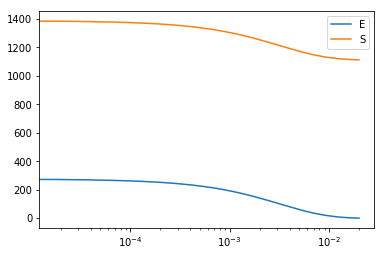

In [4]:
kf=10.
phit=0.001
L=1.0
dur=0.02#1e4
simrun=1000
phis=[0.0]
for phi in phis:
    jobs = [{'kf':kf,'phit':phit,'phi':phi,'L':L,'duration':dur}]
    exe(jobs,simrun)